# Análise dos dados de voos atrasados

## Importando Bibliotecas

In [1]:
# Ignorar avisos 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carragando o Banco de Dados

In [3]:
df = pd.read_csv('DelayedFlights.zip')

In [4]:
df['Year'].unique() # só ha valores de 2008

array([2008], dtype=int64)

In [5]:
# Excluindo a primeira coluna
df = df.drop(df.columns[:1], axis=1)

In [6]:
# Excluindo colunas que não serão utilizadas na análise
df.drop(['Year','TaxiIn', 'TaxiOut', 'TailNum', 'FlightNum', 'UniqueCarrier',
        'DepTime', 'CRSDepTime','ArrTime','CRSArrTime'], # horários
                       axis=1, inplace=True)

In [7]:
print('Verificando se há valores de tempo negativos')
print('ActualElapsedTime',len(df[df['ActualElapsedTime']<0]['ActualElapsedTime']))
print('CRSElapsedTime',len(df[df['CRSElapsedTime']<0]['CRSElapsedTime']))
print('AirTime',len(df[df['AirTime']<0]['AirTime']))

Verificando se há valores de tempo negativos
ActualElapsedTime 0
CRSElapsedTime 6
AirTime 0


In [8]:
print('Verificando se há valores de tempo zerados ou negativos')
print('ActualElapsedTime',len(df[df['ActualElapsedTime']<=0]['ActualElapsedTime']))
print('CRSElapsedTime',len(df[df['CRSElapsedTime']<=0]['CRSElapsedTime']))
print('AirTime',len(df[df['AirTime']<=0]['AirTime']))

Verificando se há valores de tempo zerados ou negativos
ActualElapsedTime 0
CRSElapsedTime 6
AirTime 7


- 'CRSElapsedTime' registra o tempo de voo programado em minutos, valores negativos são valores incosistentes, logo, precisam ser retirados.

In [9]:
df = df[df['CRSElapsedTime']>=0]

Valores Zerados ou são de voos cancelados, Desviados ou são registros errados

In [10]:
# Filtrando voos não cancelados
df = df[df['Cancelled']==0]
# como já foi retirado os cancelados, não precisa manter a coluna de cancelados e seus motivos
df.drop(['Cancelled','CancellationCode'],axis=1, inplace=True)
# filtrando os voos não desviados
df = df[df['Diverted']==0]
df.drop(['Diverted'],axis=1, inplace=True)
# os dados de voos cancelados e desviados serão analisados a parte


In [11]:
print('Verificando se há valores de tempo zerados ou negativos')
print('ActualElapsedTime',len(df[df['ActualElapsedTime']<=0]['ActualElapsedTime']))
print('CRSElapsedTime',len(df[df['CRSElapsedTime']<=0]['CRSElapsedTime']))
print('AirTime',len(df[df['AirTime']<=0]['AirTime']))

Verificando se há valores de tempo zerados ou negativos
ActualElapsedTime 0
CRSElapsedTime 0
AirTime 7


como o AirTime ainda apareceu valores inconsistentes, foram retirados do df

In [12]:
df= df[df['AirTime']>0]

In [13]:
# verificando se foram retirados todos os dados zerados nas colunas especificadas
print('Verificando se há valores de tempo zerados')
print('ActualElapsedTime',len(df[df['ActualElapsedTime']<=0]['ActualElapsedTime']))
print('CRSElapsedTime',len(df[df['CRSElapsedTime']<=0]['CRSElapsedTime']))
print('AirTime',len(df[df['AirTime']<=0]['AirTime']))

Verificando se há valores de tempo zerados
ActualElapsedTime 0
CRSElapsedTime 0
AirTime 0


Verificar a quantidade de linhas com valores nulos

In [14]:
df.isnull().sum().sort_values(ascending=False)

CarrierDelay         680881
WeatherDelay         680881
NASDelay             680881
SecurityDelay        680881
LateAircraftDelay    680881
Month                     0
DayofMonth                0
DayOfWeek                 0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
dtype: int64

Voos que não sofreram atrasos são caracterizados por valores nulos nas colunas que demonstram qualquer tipo de atraso (LateAircraftDelay, SecurityDelay, NASDelay, WeatherDelay e CarrierDelay)

In [15]:
df = df[df.notnull().all(axis=1)]  # DataFrame sem linhas contendo valores nulos

In [16]:
print('verificado os nulos depois do tratamento')
df.isnull().sum().sort_values(ascending=False)

verificado os nulos depois do tratamento


Month                0
DayofMonth           0
DayOfWeek            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [17]:
lista_var_continuas = ['ActualElapsedTime','CRSElapsedTime', 
                       'AirTime','ArrDelay','DepDelay','Distance',
                       'CarrierDelay','WeatherDelay','SecurityDelay',
                       'NASDelay','LateAircraftDelay']
lista_var_discretas = ['Month','DayofMonth','DayOfWeek']

In [18]:
df[lista_var_continuas].describe()

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,SecurityDelay,NASDelay,LateAircraftDelay
count,1.247482e+06,1.247482e+06,1.247482e+06,1.247482e+06,1.247482e+06,1.247482e+06,1.247482e+06,1.247482e+06,1.247482e+06,1.247482e+06,1.247482e+06
mean,1.353780e+02,1.317642e+02,1.074208e+02,6.329102e+01,5.967724e+01,7.415872e+02,1.917949e+01,3.703505e+00,9.013757e-02,1.502146e+01,2.529642e+01
std,7.229639e+01,6.953194e+01,6.817427e+01,6.075409e+01,5.986909e+01,5.593645e+02,4.354629e+01,2.149276e+01,2.022719e+00,3.383271e+01,4.205481e+01
min,1.400000e+01,1.000000e+00,1.000000e+00,1.500000e+01,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.300000e+01,8.000000e+01,5.800000e+01,2.600000e+01,2.400000e+01,3.340000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.180000e+02,1.150000e+02,9.000000e+01,4.300000e+01,4.100000e+01,5.950000e+02,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.000000e+00
75%,1.670000e+02,1.610000e+02,1.360000e+02,7.900000e+01,7.500000e+01,9.720000e+02,2.100000e+01,0.000000e+00,0.000000e+00,1.500000e+01,3.300000e+01
max,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.436000e+03,1.352000e+03,3.920000e+02,1.357000e+03,1.316000e+03


Podemos verificar que há uma grande diferença ente o valor máximo e o quartil 75% para as variáveis que quantificam o atraso

In [19]:
# Configurar opções de exibição para evitar notação científica
pd.set_option('display.float_format', '{:.2f}'.format)

# Mostrar estatísticas descritivas sem notação científica
print(df['ArrDelay'].describe(percentiles=[0.75, 0.80, 0.90, 0.95]))

count   1247482.00
mean         63.29
std          60.75
min          15.00
50%          43.00
75%          79.00
80%          91.00
90%         132.00
95%         176.00
max        2461.00
Name: ArrDelay, dtype: float64


serão retirados os registros com atraso maior que o quantil de 95% por se tratar de uma ocorrência rara

In [20]:
# Calcular o quantil de 95%
quantil = df['ArrDelay'].quantile(0.95)

# Aplicar o filtro
df  = df.loc[df['ArrDelay'] <= quantil]

Levando em consideração que o campo AirTime indica o tempo no ar em minutos, não faz sentido que um voo dure apenas uns minutos no ar. Por isso, será retirado os primeiro 5% dos dados de AirTime

In [21]:
# Calcular o quantil de 5%
quantil_5 = df['AirTime'].quantile(0.05)

# Aplicar o filtro
df  = df.loc[df['AirTime'] >= quantil_5]

# Calcular o quantil de 5%
quantil_5 = df['CRSElapsedTime'].quantile(0.05)

# Aplicar o filtro
df  = df.loc[df['CRSElapsedTime'] >= quantil_5]

In [22]:
df['ActualElapsedTime'].describe(percentiles=[0.75,0.85,0.9,0.93,0.95])

count   1073266.00
mean        142.65
std          70.27
min          40.00
50%         125.00
75%         172.00
85%         209.00
90%         240.00
93%         266.00
95%         290.00
max         790.00
Name: ActualElapsedTime, dtype: float64

In [23]:
# como voos extremamentes longos são incomuns, voos que duraram mais de 90% que o conjunto de dados serão retirados
# Calcular o quantil de 95%
quantil = df['ActualElapsedTime'].quantile(0.9)

# Aplicar o filtro
df  = df.loc[df['ActualElapsedTime'] <= quantil]

In [24]:
# no mesmo sentido, voos com distâncias extremamente longas são incomuns, então serão retirados para melhor análise dos dados

In [25]:
df['Distance'].describe(percentiles=[0.75,0.85,0.9,0.95])

count   966870.00
mean       663.97
std        353.73
min         67.00
50%        595.00
75%        892.00
85%       1040.00
90%       1147.00
95%       1379.00
max       2288.00
Name: Distance, dtype: float64

In [26]:
quantil = df['Distance'].quantile(0.95)

# Aplicar o filtro
df  = df.loc[df['Distance'] <= quantil]

In [27]:
df[lista_var_continuas].describe()

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,SecurityDelay,NASDelay,LateAircraftDelay
count,919143.00,919143.00,919143.00,919143.00,919143.00,919143.00,919143.00,919143.00,919143.00,919143.00,919143.00
mean,120.20,117.52,93.02,53.58,50.90,617.66,15.59,2.81,0.09,12.76,22.33
std,40.57,37.70,37.10,36.92,37.31,295.36,27.21,13.75,1.79,25.21,32.19
min,40.00,62.00,34.00,15.00,6.00,67.00,0.00,0.00,0.00,0.00,0.00
25%,86.00,85.00,62.00,25.00,23.00,369.00,0.00,0.00,0.00,0.00,0.00
50%,115.00,111.00,87.00,41.00,40.00,581.00,2.00,0.00,0.00,1.00,9.00
75%,149.00,145.00,120.00,72.00,69.00,849.00,20.00,0.00,0.00,14.00,32.00
max,240.00,290.00,229.00,176.00,243.00,1379.00,176.00,176.00,170.00,176.00,176.00


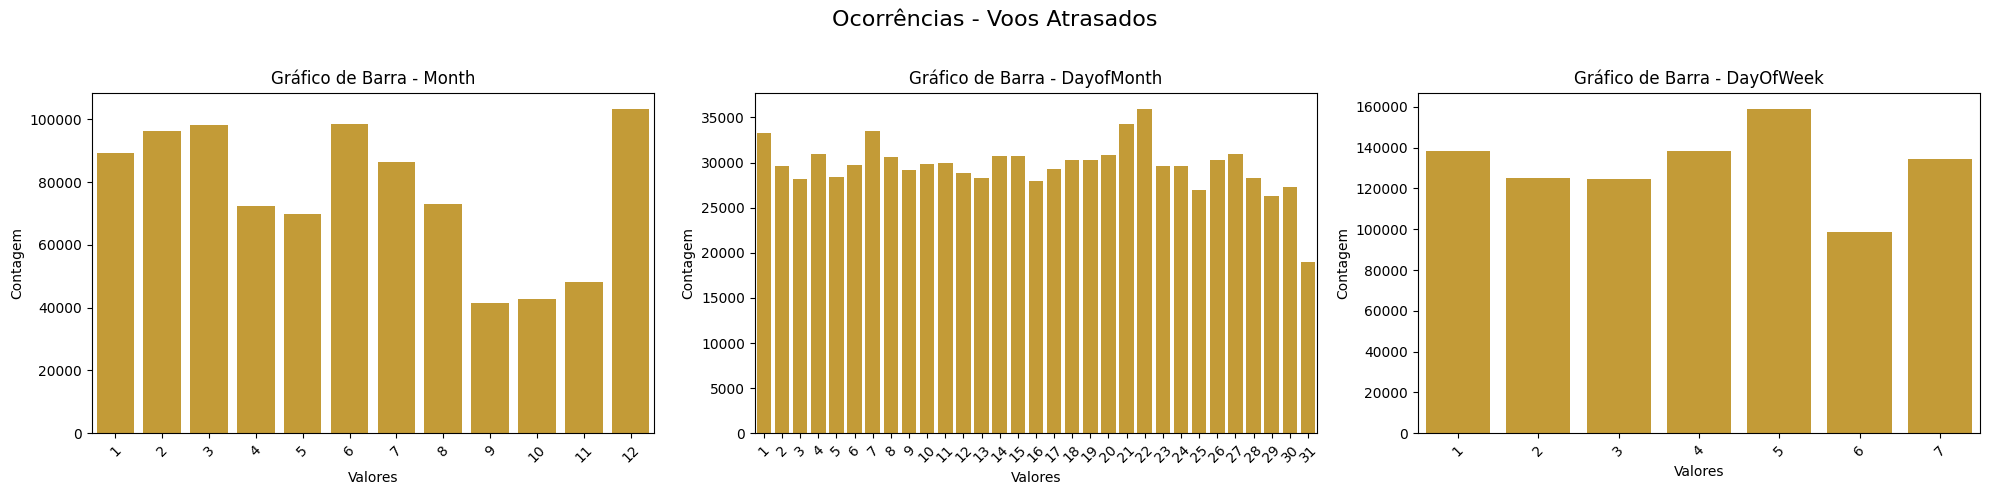

In [28]:
# Criar gráficos de barra para variáveis discretas
fig, axs =plt.subplots(1,3, figsize = (20,5))

for i, ax in zip(lista_var_discretas, axs.flatten()):
    sns.countplot(x=i, data=df[[i]], ax=ax, color='goldenrod')
    ax.set_title(f'Gráfico de Barra - {i}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Contagem')

    # Ajusta a rotação dos rótulos para melhor legibilidade
    ax.tick_params(axis='x', rotation=45)
# Adiciona um título geral acima dos subgráficos
fig.suptitle('Ocorrências - Voos Atrasados', fontsize=16)
# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

# Exibe a figura
plt.show()

Analisando os dados de histogramas, podemos observar que os meses de setembro, outubro e novembro são os meses com menos incidência de atrasos de voos no ano de 2008 nos Estados Unidos da América e o dia da semana com menos atraso é o sábado.

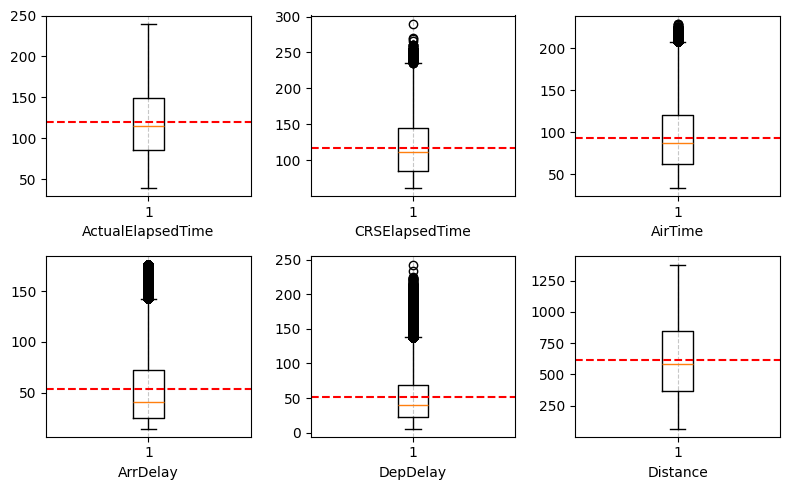

In [29]:
fig = plt.figure(figsize = (8,5))

for i, col in enumerate(df[['ActualElapsedTime','CRSElapsedTime', 
                       'AirTime','ArrDelay','DepDelay','Distance']]):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.axhline(y=df[col].mean(), linestyle='--', color="red")
    
plt.tight_layout()     
plt.show()

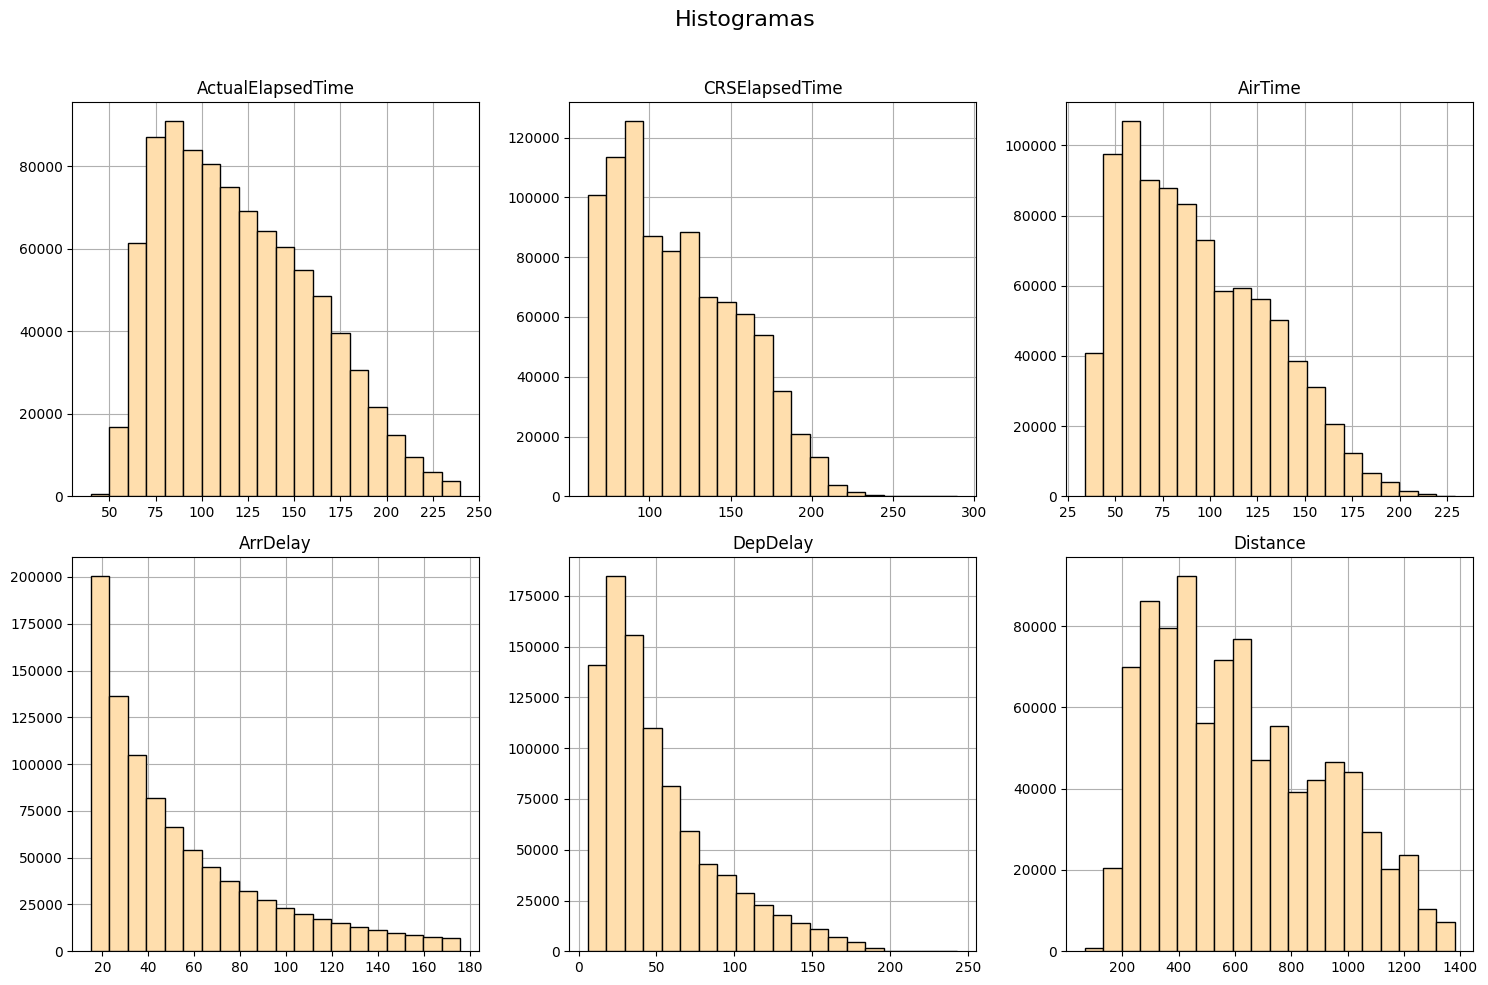

In [30]:
# Criação do grid de subgráficos 4x4
fig, axs = plt.subplots(2, 3, figsize=(15, 10))


for i, ax in zip(lista_var_continuas, axs.flatten()):
    df[i].hist(bins=20, edgecolor='black', color ='NavajoWhite',ax=ax, zorder=4)
    ax.set_title(f'{i}')
# Adiciona um título geral acima dos subgráficos
fig.suptitle('Histogramas', fontsize=16, zorder=1)  # Definindo zorder para o título geral

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

plt.show()

Podemos observar que há muitos registros de voos atrasados tanto na partida quanto na chegada, com maior ocorrência com menos de uma hora de atraso.

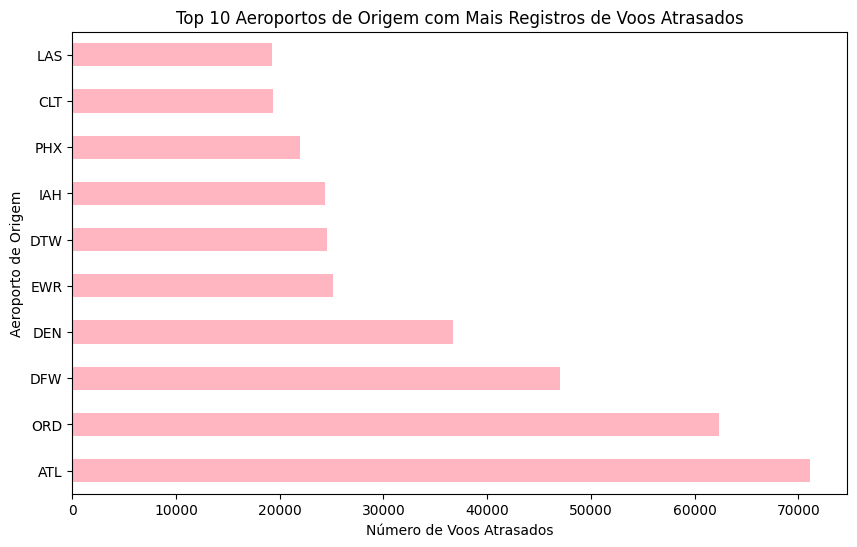

In [31]:
# Origem com mais registros de voos atrasados
top_origin_counts = df['Origin'].value_counts().nlargest(10)

# Criar gráfico de barras horizontais
plt.figure(figsize=(10, 6))
ax = top_origin_counts.plot(kind='barh', color='lightpink')

# Adicionar etiquetas e título
plt.xlabel('Número de Voos Atrasados')
plt.ylabel('Aeroporto de Origem')
plt.title('Top 10 Aeroportos de Origem com Mais Registros de Voos Atrasados')

plt.show()

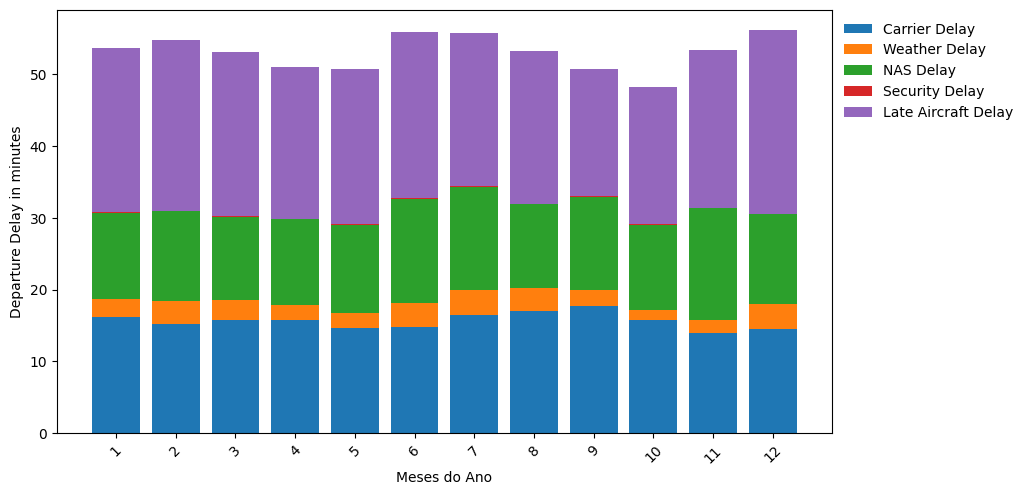

In [43]:
df['total_delay'] = (df['CarrierDelay'] + df['WeatherDelay']
             + df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay'])

df_delayed = df[~np.isnan(df['total_delay'])]
df['total_delay'].fillna(0, inplace=True)
df_delayed.head()

carrier_group = df_delayed['CarrierDelay'].groupby(df_delayed['Month']).mean()
weather_group = df_delayed['WeatherDelay'].groupby(df_delayed['Month']).mean()
nas_group = df_delayed['NASDelay'].groupby(df_delayed['Month']).mean()
security_group = df_delayed['SecurityDelay'].groupby(df_delayed['Month']).mean()
late_group = df_delayed['LateAircraftDelay'].groupby(df_delayed['Month']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (10,5.5))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Meses do Ano')
ax.set_ylabel('Departure Delay in minutes')

plt.legend(bbox_to_anchor=(1.0, 1.0),frameon=False)
plt.show()

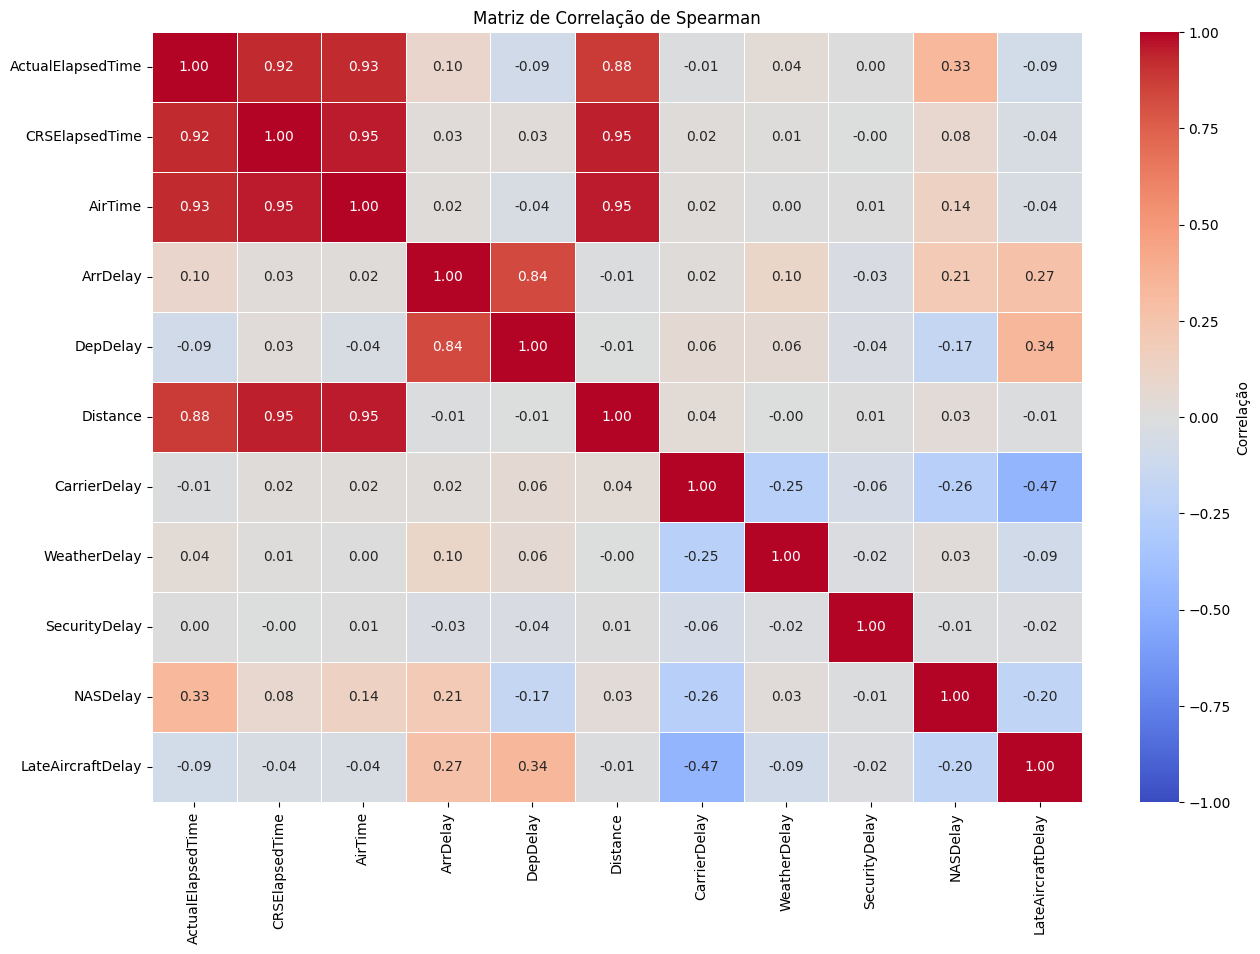

In [33]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Criando a matriz de correlação de Spearman
corr_matrix = df[lista_var_continuas].corr(method="spearman")

# Customizando o heatmap com Seaborn
sns.heatmap(corr_matrix, annot=True, 
            cmap="coolwarm", # cores de azul até vermelho
            vmin=-1, vmax=1,  # Valores máximos e mínimos da barra de cor
            fmt=".2f", linewidths=.5, 
            cbar_kws={"label": "Correlação"})

# Adicionando título
plt.title("Matriz de Correlação de Spearman")

# Exibindo o gráfico
plt.show()

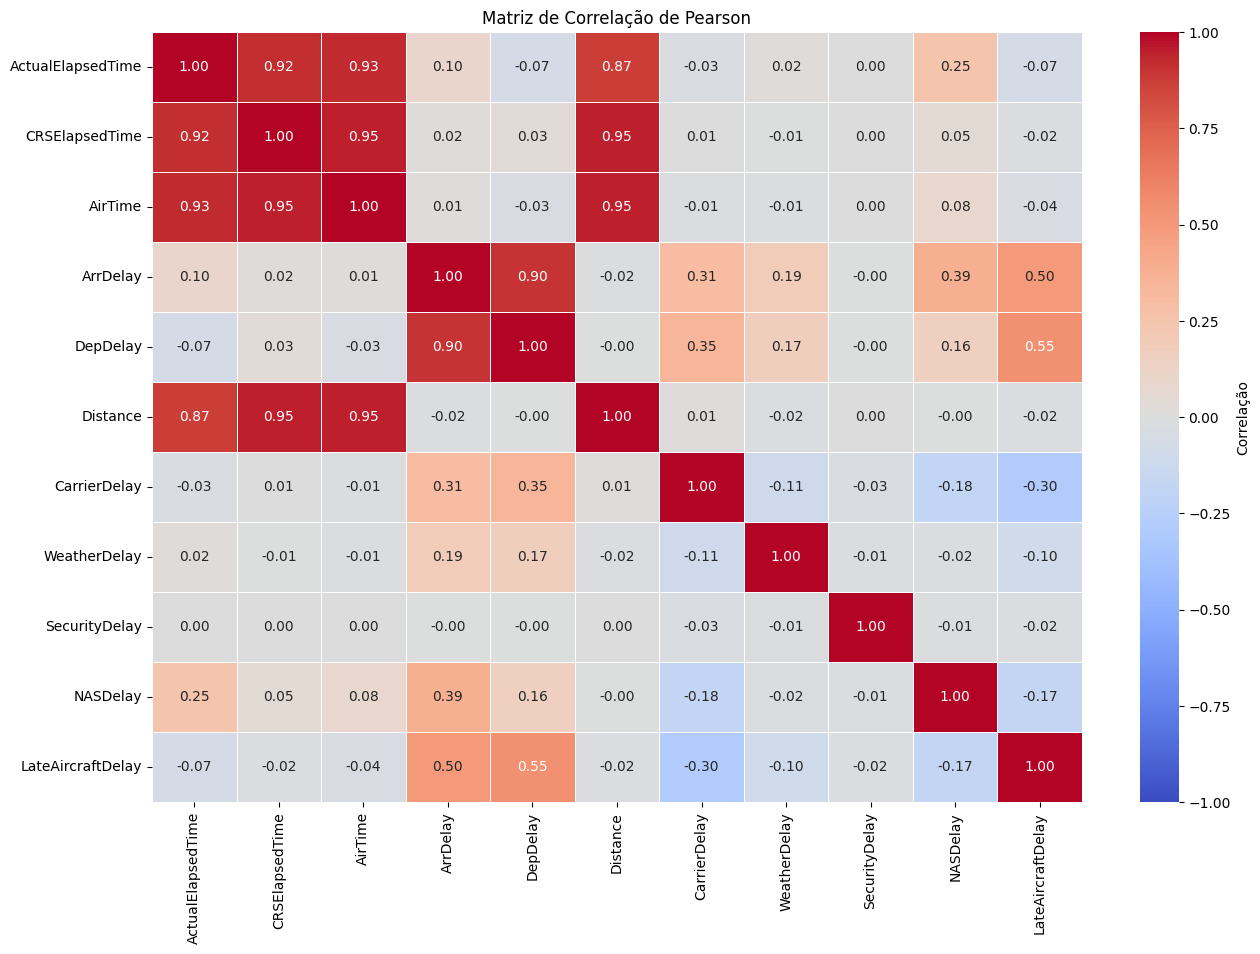

In [34]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Criando a matriz de correlação de Spearman
corr_matrix = df[lista_var_continuas].corr(method="pearson")

# Customizando o heatmap com Seaborn
sns.heatmap(corr_matrix, annot=True, 
            cmap="coolwarm", # cores de azul até vermelho
            vmin=-1, vmax=1,  # Valores máximos e mínimos da barra de cor
            fmt=".2f", linewidths=.5, 
            cbar_kws={"label": "Correlação"})

# Adicionando título
plt.title("Matriz de Correlação de Pearson")

# Exibindo o gráfico
plt.show()